![alt text](https://i.imgur.com/1WaY7aA.png)


---



---



# Lab 2.2.2 
# *Mining Social Media with Twitter*

## The Twitter API and Tweepy Package

The Twitter API provides access to tweets and comments, and allows an application to post tweets to the user's timeline. 

Twitter requires developers to create and authenticate an app before they can use the API. As of recent policy changes, however, new developers must be approved before they can create an app. There is no indication of the waiting period for approval.

### 1. Apply for Developer Access

Go to https://blog.twitter.com/developer/en_us/topics/tools/2018/new-developer-requirements-to-protect-our-platform.html
and read the advice.
![image.png](attachment:image.png)

Apply at https://developer.twitter.com/en/apply-for-access.html
![image.png](attachment:image.png)

Then go to https://developer.twitter.com/en/review every day until you see whatever comes after this: 
![image.png](attachment:image.png)

### 2. Create Your Twitter App
![image.png](attachment:image.png)

### 3. Load Python Libraries

In [5]:
import tweepy
import json
import pprint

### 4. Authenticate from your Python script

You could assign your authentication details explicitly, as follows:

In [2]:
my_consumer_key = 'RKRhFnpgdz8MmqmcyzqsU7NxN'      # your consumer key (string) goes in here
my_consumer_secret = '4V0gKxJSc2sE2uLpWlLUF4PeeLnrwsbhsDJlzmXKgI1kgO6bdQ'   # your consumer secret key (string) goes in here
my_access_token = '4673077273-IC4RW3eJqyJJhsrVnbuCFAURkk3BmsGak33ZUG6'    
# your access token (string goes in here
access_token_secret = '4R5nvxQYS8Jng85isDqLLXrno3LtGR6uOvAjiwvZSOey6'  
# your access token secret (string) goes in here

A better way would be to store these details externally, so they are not displayed in the notebook:

- create a file called "auth_twitter.json" in your "notebooks" directory, and save your credentials there in JSON format:

`{   "my_consumer_key": "your consumer key (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;` "my_consumer_secret": "your consumer secret key (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"your access token (string goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"my_access_token_secret": "your access token secret (string) goes in here"` <br>
`}`

(Nb. Parsers are very fussy. Make sure each key:value pair has a comma after it except the last one!)  

Use the following code to load the credentials:  

In [3]:
pwd()  # make sure your working directory is where the file is

'/Users/bob/Desktop/Datascience/DSIA-SYD-FT-201907/DSIA-SYD-FT-201907/Module 2/LABS 2'

In [7]:
import json

auth_twitter_json = {
    'consumer_key': 'RKRhFnpgdz8MmqmcyzqsU7NxN'      # your consumer key (string) goes in here
    , 'consumer_secret': '4V0gKxJSc2sE2uLpWlLUF4PeeLnrwsbhsDJlzmXKgI1kgO6bdQ'   # your consumer secret key (string) goes in here
    , 'access_token': '4673077273-IC4RW3eJqyJJhsrVnbuCFAURkk3BmsGak33ZUG6'      # your access token (string goes in here
    , 'access_token_secret': '4R5nvxQYS8Jng85isDqLLXrno3LtGR6uOvAjiwvZSOey6'  # your access token secret (string) goes in here
}


with open('auth_twitter.json', 'w') as outfile:  
    json.dump(auth_twitter_json, outfile)

In [8]:
path_auth = 'auth_twitter.json'




auth = json.loads(open(path_auth).read())
pp = pprint.PrettyPrinter(indent=4)
# For debugging only:
#pp.pprint(auth)

my_consumer_key = auth['consumer_key']
my_consumer_secret = auth['consumer_secret']
my_access_token = auth['access_token']
my_access_token_secret = auth['access_token_secret']

Security considerations: 
- this method only keeps your credentials invisible as long as nobody accesses this notebook while it's running on your computer 
- if you wanted another user to have access to the executable notebook without divulging your credentials you should set up an OAuth 2.0 workflow to let them obtain and apply their own API tokens when using your app
- if you just want to share your analyses, you could use a separate script (which you don't share) to fetch the data and save it locally, then use a second notebook (with no API access) to load and analyse the locally stored data

### 5. Exploring the API

Here is how to connect to Twitter using the Tweepy library:

In [9]:
auth = tweepy.OAuthHandler(my_consumer_key, my_consumer_secret)
auth.set_access_token(my_access_token, my_access_token_secret)
api = tweepy.API(auth)

In the next cell, put the cursor after the '.' and hit the [tab] key to see the available members and methods in the response object:

In [13]:
api.followers()[0]._json

{'id': 403063766,
 'id_str': '403063766',
 'name': 'Azariah Levy',
 'screen_name': 'peeon12',
 'location': '',
 'description': 'Find me here https://t.co/KORhlOBpwM',
 'url': None,
 'entities': {'description': {'urls': [{'url': 'https://t.co/KORhlOBpwM',
     'expanded_url': 'http://tinyurl.com/j7f8ts9',
     'display_url': 'tinyurl.com/j7f8ts9',
     'indices': [13, 36]}]}},
 'protected': False,
 'followers_count': 18,
 'friends_count': 1641,
 'listed_count': 0,
 'created_at': 'Tue Nov 01 23:47:16 +0000 2011',
 'favourites_count': 0,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 2,
 'lang': None,
 'status': {'created_at': 'Tue Jul 05 09:46:41 +0000 2016',
  'id': 750264628882632704,
  'id_str': '750264628882632704',
  'text': 'Hey! suger, do yo want to f!ck me everywhere? go to  https://t.co/Wkzv3mjZm6 https://t.co/3sYZYNMehm',
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'url

Consult the Tweept and Twitter API documentation. Print a few of the response members below:

This will fetch recent tweets from accounts you follow:

In [14]:
# Recent tweets from accounts you follow:
tweets = api.home_timeline()
for tweet in tweets:
    print(tweet.text)

One of two Sydney brothers accused of attacking a retiree who was dragged from his car before being bashed and fata… https://t.co/8CydDKaoHt
.@HawthornFC is one of a number of clubs closely watching the Crows' negotiations with Hugh Greenwood, reports @AFLcomau.
The ultimate #Pride party in the sky https://t.co/8wfDapUiUS @VirginAtlantic @VirginHolidays #VirginFamily https://t.co/wroogOg742
Chloe Wiegand loved looking out windows. https://t.co/DBaVkTO9J2
Sandy Martin AKA Grandma Dynamite is celebrating 15 years since the cult classic ‘Napoleon Dynamite’! #9Today 
https://t.co/zXHiNWKz3b
Kazakhstan arrested a former Russian KGB agent accused of passing classified documents to Chinese agents. News of h… https://t.co/xFpeViIsEY
ROUND 17 #NRL FIXTURES

🎟 - https://t.co/uRzhCA7vTC https://t.co/MPnu7kUilP
Hawaii's governor announced that construction will begin next week on the largest telescope in the Northern Hemisph… https://t.co/BNnz6J8x25
Amal Clooney criticizes world leaders for "colle

The request to see your own recent tweets is similar, but uses the `user_timeline` endpoint. Try this below:

In [15]:
tweets = api.user_timeline()
for tweet in tweets:
    print(tweet.text)

#NewProfilePic https://t.co/z1uyMcGa11
What you can control is just yourself. https://t.co/pGhVYAYkJB


Now, instead of printing the text of each tweet, print the `created_at` and `id_str` methods:

In [16]:
tweets = api.user_timeline()
for tweet in tweets:
    print(tweet.created_at)
#     print(tweet.id_str)
    print(tweet.text)

2019-01-13 23:52:25
#NewProfilePic https://t.co/z1uyMcGa11
2019-01-13 23:49:11
What you can control is just yourself. https://t.co/pGhVYAYkJB


In [21]:
tweet_list = []

for tweet in tweets:
    tweet_list.append(tweet._json)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
df = pd.DataFrame(tweet_list)

In [25]:
df['created_at'] = pd.to_datetime(df['created_at'])
df.set_index('created_at', inplace=True)


In [26]:
df.dtypes


contributors                 object
coordinates                  object
entities                     object
extended_entities            object
favorite_count                int64
favorited                      bool
geo                          object
id                            int64
id_str                       object
in_reply_to_screen_name      object
in_reply_to_status_id        object
in_reply_to_status_id_str    object
in_reply_to_user_id          object
in_reply_to_user_id_str      object
is_quote_status                bool
lang                         object
place                        object
possibly_sensitive             bool
retweet_count                 int64
retweeted                      bool
source                       object
text                         object
truncated                      bool
user                         object
dtype: object

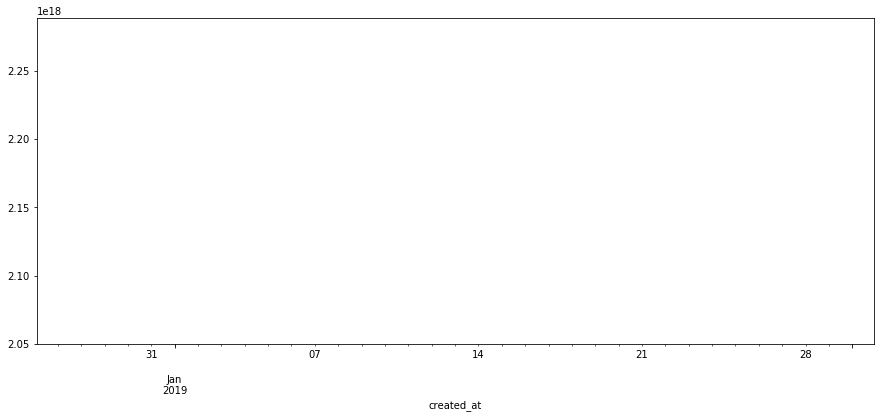

In [28]:
y = df['id'].resample('D').sum()
y.plot(figsize=(15, 6));

In [30]:
from wordcloud import WordCloud, STOPWORDS

In [31]:
def check_tweets(twitter_handle):
    json_str = []
    for status in tweepy.Cursor(api.user_timeline,id=twitter_handle).items(200):
        json_str.append(status._json)
    
    df = pd.DataFrame(json_str)
    df['created_at'] = pd.to_datetime(df['created_at'])
    df.set_index('created_at', inplace=True)
    
    y = df['id'].resample('D').count()
    y.plot(figsize=(15, 6))
    plt.show();

In [32]:
def check_tweets_wordcloud(twitter_handle, withall=True):
    json_str = []
    for status in tweepy.Cursor(api.user_timeline,id=twitter_handle).items(200):
        json_str.append(status._json)
    
    df = pd.DataFrame(json_str)
    
    if withall: 
        text = df.text.values
    else:
        text = ','.join([x for x in df.text.values])
        blob = TextBlob(text)
        text = blob.noun_phrases
    
    wordcloud = WordCloud(
        width = 3000
        , height = 2000
        , background_color = 'black'
        , stopwords = STOPWORDS
    ).generate(str(text))
    
    fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

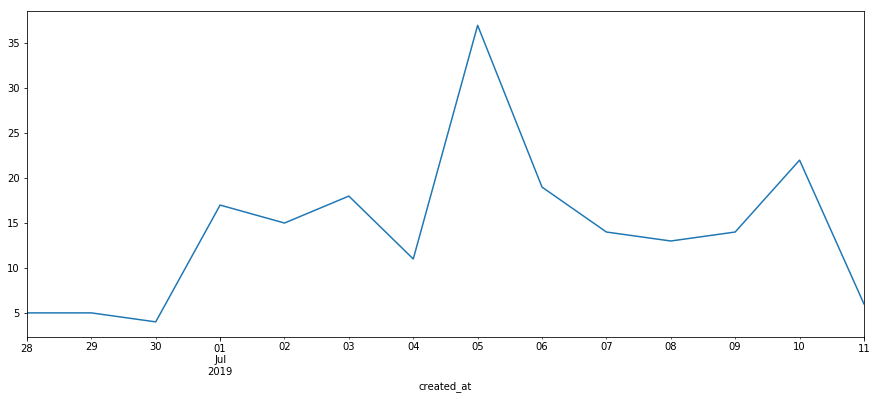

In [34]:
check_tweets('realDonaldTrump')

In [36]:
check_tweets_wordcloud('realDonaldTrump', withall=False)

NameError: name 'TextBlob' is not defined

You can create a tweet as follows:

In [17]:
# create a tweet:
tweet = api.update_status('Test: Made with Tweepy')

(Nb. Don't abuse this feature! If you try to generate a zillion tweets in a loop, Twitter will ban youur account.)

Tweets can be deleted by reference to their `id_str` attribute:

In [18]:
# delete a tweet:
status = api.destroy_status(tweet.id_str)

You can follow a Tweeter:

In [19]:
# follow:
api.create_friendship('@YouTube')

User(_api=<tweepy.api.API object at 0x1137237f0>, _json={'id': 10228272, 'id_str': '10228272', 'name': 'YouTube', 'screen_name': 'YouTube', 'location': 'San Bruno, CA', 'description': 'Pivoting to video.', 'url': 'https://t.co/F3fLcfn45H', 'entities': {'url': {'urls': [{'url': 'https://t.co/F3fLcfn45H', 'expanded_url': 'http://youtube.com', 'display_url': 'youtube.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 71642605, 'friends_count': 1037, 'listed_count': 81978, 'created_at': 'Tue Nov 13 21:43:46 +0000 2007', 'favourites_count': 2494, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 23510, 'lang': None, 'status': {'created_at': 'Wed Jul 10 15:42:06 +0000 2019', 'id': 1148980725900808193, 'id_str': '1148980725900808193', 'text': 'Meet #CreatorOnTheRise, Stephanie Moratto, who vlogs about her daily life with her 59 animals! 🐴 →… https://t.co/qS7tQTMuDK', 'truncated': True, 'entities': {'

or unfollow:

In [20]:
# unfollow:
api.destroy_friendship('@YouTube')

User(_api=<tweepy.api.API object at 0x1137237f0>, _json={'id': 10228272, 'id_str': '10228272', 'name': 'YouTube', 'screen_name': 'YouTube', 'location': 'San Bruno, CA', 'description': 'Pivoting to video.', 'url': 'https://t.co/F3fLcfn45H', 'entities': {'url': {'urls': [{'url': 'https://t.co/F3fLcfn45H', 'expanded_url': 'http://youtube.com', 'display_url': 'youtube.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 71642609, 'friends_count': 1037, 'listed_count': 81978, 'created_at': 'Tue Nov 13 21:43:46 +0000 2007', 'favourites_count': 2494, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 23510, 'lang': None, 'status': {'created_at': 'Wed Jul 10 15:42:06 +0000 2019', 'id': 1148980725900808193, 'id_str': '1148980725900808193', 'text': 'Meet #CreatorOnTheRise, Stephanie Moratto, who vlogs about her daily life with her 59 animals! 🐴 →… https://t.co/qS7tQTMuDK', 'truncated': True, 'entities': {'

>
>

>
>



---



---

>  > > > > > > > > © 2019 Data Science Institute of Australia



---



---

